# The easiest assignment in this course

Cope one of these notebooks (`Linear SoftMax Classifier.ipynb`, `Polynomial SoftMax Classifier.ipynb`) and replace the model with multilayer neural network. Play with nonlinearities, also generate your own, more entangled data and check your models perfrmance. Good luck!

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import time
from IPython.display import clear_output
import tensorflow as tf

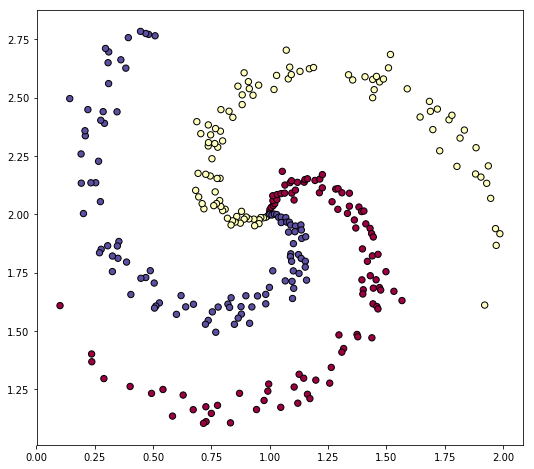

In [19]:



N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
X[:, 0] += 1
X[:, 1] += 2
# lets visualize the data:
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors="black")
ax = plt.gca()
ax.set_aspect("equal")
plt.show()

In [20]:
def plot(h=0.02):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                 np.arange(y_min, y_max, h))
    Z = sess.run(t_prediction, feed_dict={t_x: np.column_stack([xx.ravel(), yy.ravel()])})
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10,8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.gca().set_aspect("equal")
    plt.show()

In [21]:
input_X = tf.placeholder(tf.float32, shape = [None, 2], name = 'inputs')
target_y = tf.placeholder(tf.int32, shape = [None], name = 'target')

In [22]:
l1 = tf.layers.dense(input_X,
                     units = 20,
                     activation = tf.nn.relu)

l2 = tf.layers.dense(l1,
                     units = 3, 
                     activation = None)

l_out = tf.nn.softmax(l2, name = 'predict_proba')
y_predicted = tf.argmax(l2, axis = 1)

In [27]:
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
    labels=target_y, logits=l2, name="softmax_loss"))
accuracy, update_accuracy = tf.metrics.accuracy(target_y, y_predicted)
optimzer = tf.train.AdamOptimizer(learning_rate=0.01)
train_step = optimzer.minimize(loss)

In [24]:
# An auxilary function that returns mini-batches for neural network training

#Parameters
# inputs - a tensor of images with shape (many, 1, 28, 28), e.g. X_train
# outputs - a vector of answers for corresponding images e.g. Y_train
#batch_size - a single number - the intended size of each batches

def iterate_minibatches(inputs, targets, batchsize):
    assert len(inputs) == len(targets)
    indices = np.arange(len(inputs))
    np.random.shuffle(indices)
    for start_idx in range(0, len(inputs) - batchsize + 1, batchsize):
        excerpt = indices[start_idx:start_idx + batchsize]
        yield inputs[excerpt], targets[excerpt]

In [37]:
model_path = "./checkpoints/model.ckpt"
saver = tf.train.Saver(max_to_keep=3)

In [41]:
import time

num_epochs = 500 # amount of passes through the data

batch_size = 100 # number of samples processed at each function call

with tf.Session() as sess:
    #initialize global wariables
    sess.run(tf.global_variables_initializer())
    #load_path = saver.restore(sess, saver.last_checkpoints[-1])
    
    for epoch in range(num_epochs):
        # In each epoch, we do a full pass over the training data:
        train_err = 0
        train_batches = 0
        start_time = time.time()

        sess.run(tf.local_variables_initializer())
        for batch in iterate_minibatches(X, y,batch_size):
            inputs, targets = batch

            _, train_err_batch, _ = sess.run(
                [train_step, loss, update_accuracy],
                feed_dict={input_X: inputs, target_y:targets}
            )
            train_err += train_err_batch
            train_batches += 1
        train_acc = sess.run(accuracy)

        # Then we print the results for this epoch:
        print("Epoch {} of {} took {:.3f}s".format(
            epoch + 1, num_epochs, time.time() - start_time))

        print("  training loss (in-iteration):\t\t{:.6f}".format(train_err / train_batches))
        print("  train accuracy:\t\t{:.2f} %".format(
            train_acc * 100))


Epoch 1 of 500 took 0.383s
  training loss (in-iteration):		1.077050
  train accuracy:		30.00 %
Epoch 2 of 500 took 0.261s
  training loss (in-iteration):		1.047338
  train accuracy:		36.67 %
Epoch 3 of 500 took 0.335s
  training loss (in-iteration):		1.034616
  train accuracy:		32.67 %
Epoch 4 of 500 took 0.348s
  training loss (in-iteration):		1.019773
  train accuracy:		32.33 %
Epoch 5 of 500 took 0.343s
  training loss (in-iteration):		1.003974
  train accuracy:		42.67 %
Epoch 6 of 500 took 0.383s
  training loss (in-iteration):		0.994959
  train accuracy:		53.33 %
Epoch 7 of 500 took 0.338s
  training loss (in-iteration):		0.985717
  train accuracy:		59.33 %
Epoch 8 of 500 took 0.389s
  training loss (in-iteration):		0.973978
  train accuracy:		56.33 %
Epoch 9 of 500 took 0.359s
  training loss (in-iteration):		0.961790
  train accuracy:		53.67 %
Epoch 10 of 500 took 0.343s
  training loss (in-iteration):		0.952137
  train accuracy:		52.00 %
Epoch 11 of 500 took 0.431s
  training 

Epoch 86 of 500 took 0.326s
  training loss (in-iteration):		0.582430
  train accuracy:		68.67 %
Epoch 87 of 500 took 0.285s
  training loss (in-iteration):		0.580815
  train accuracy:		68.00 %
Epoch 88 of 500 took 0.302s
  training loss (in-iteration):		0.577947
  train accuracy:		68.67 %
Epoch 89 of 500 took 0.299s
  training loss (in-iteration):		0.575984
  train accuracy:		69.33 %
Epoch 90 of 500 took 0.248s
  training loss (in-iteration):		0.571762
  train accuracy:		69.67 %
Epoch 91 of 500 took 0.359s
  training loss (in-iteration):		0.569006
  train accuracy:		69.67 %
Epoch 92 of 500 took 0.307s
  training loss (in-iteration):		0.566962
  train accuracy:		69.67 %
Epoch 93 of 500 took 0.293s
  training loss (in-iteration):		0.566340
  train accuracy:		69.00 %
Epoch 94 of 500 took 0.247s
  training loss (in-iteration):		0.561707
  train accuracy:		69.00 %
Epoch 95 of 500 took 0.234s
  training loss (in-iteration):		0.560043
  train accuracy:		69.33 %
Epoch 96 of 500 took 0.314s
  

Epoch 170 of 500 took 0.278s
  training loss (in-iteration):		0.416722
  train accuracy:		84.33 %
Epoch 171 of 500 took 0.276s
  training loss (in-iteration):		0.416257
  train accuracy:		82.67 %
Epoch 172 of 500 took 0.343s
  training loss (in-iteration):		0.417103
  train accuracy:		84.67 %
Epoch 173 of 500 took 0.292s
  training loss (in-iteration):		0.413626
  train accuracy:		88.00 %
Epoch 174 of 500 took 0.262s
  training loss (in-iteration):		0.410995
  train accuracy:		84.33 %
Epoch 175 of 500 took 0.212s
  training loss (in-iteration):		0.414651
  train accuracy:		81.33 %
Epoch 176 of 500 took 0.302s
  training loss (in-iteration):		0.417325
  train accuracy:		83.33 %
Epoch 177 of 500 took 0.333s
  training loss (in-iteration):		0.409670
  train accuracy:		87.33 %
Epoch 178 of 500 took 0.264s
  training loss (in-iteration):		0.406946
  train accuracy:		85.67 %
Epoch 179 of 500 took 0.204s
  training loss (in-iteration):		0.407281
  train accuracy:		82.33 %
Epoch 180 of 500 too

Epoch 254 of 500 took 0.311s
  training loss (in-iteration):		0.334436
  train accuracy:		92.33 %
Epoch 255 of 500 took 0.345s
  training loss (in-iteration):		0.335823
  train accuracy:		90.33 %
Epoch 256 of 500 took 0.440s
  training loss (in-iteration):		0.332075
  train accuracy:		91.67 %
Epoch 257 of 500 took 0.376s
  training loss (in-iteration):		0.334150
  train accuracy:		93.00 %
Epoch 258 of 500 took 0.413s
  training loss (in-iteration):		0.334676
  train accuracy:		93.33 %
Epoch 259 of 500 took 0.356s
  training loss (in-iteration):		0.330642
  train accuracy:		91.00 %
Epoch 260 of 500 took 0.414s
  training loss (in-iteration):		0.332449
  train accuracy:		92.67 %
Epoch 261 of 500 took 0.254s
  training loss (in-iteration):		0.328192
  train accuracy:		92.67 %
Epoch 262 of 500 took 0.204s
  training loss (in-iteration):		0.328750
  train accuracy:		90.67 %
Epoch 263 of 500 took 0.339s
  training loss (in-iteration):		0.328358
  train accuracy:		91.00 %
Epoch 264 of 500 too

Epoch 338 of 500 took 0.325s
  training loss (in-iteration):		0.280851
  train accuracy:		92.67 %
Epoch 339 of 500 took 0.274s
  training loss (in-iteration):		0.284014
  train accuracy:		91.33 %
Epoch 340 of 500 took 0.314s
  training loss (in-iteration):		0.280268
  train accuracy:		93.67 %
Epoch 341 of 500 took 0.305s
  training loss (in-iteration):		0.284711
  train accuracy:		93.33 %
Epoch 342 of 500 took 0.282s
  training loss (in-iteration):		0.276844
  train accuracy:		94.00 %
Epoch 343 of 500 took 0.237s
  training loss (in-iteration):		0.276333
  train accuracy:		94.00 %
Epoch 344 of 500 took 0.291s
  training loss (in-iteration):		0.277634
  train accuracy:		92.33 %
Epoch 345 of 500 took 0.324s
  training loss (in-iteration):		0.274072
  train accuracy:		94.00 %
Epoch 346 of 500 took 0.319s
  training loss (in-iteration):		0.276900
  train accuracy:		92.00 %
Epoch 347 of 500 took 0.331s
  training loss (in-iteration):		0.275208
  train accuracy:		92.67 %
Epoch 348 of 500 too

Epoch 422 of 500 took 0.299s
  training loss (in-iteration):		0.240582
  train accuracy:		95.00 %
Epoch 423 of 500 took 0.357s
  training loss (in-iteration):		0.241287
  train accuracy:		94.00 %
Epoch 424 of 500 took 0.377s
  training loss (in-iteration):		0.239156
  train accuracy:		94.33 %
Epoch 425 of 500 took 0.277s
  training loss (in-iteration):		0.236929
  train accuracy:		94.67 %
Epoch 426 of 500 took 0.329s
  training loss (in-iteration):		0.237661
  train accuracy:		94.67 %
Epoch 427 of 500 took 0.332s
  training loss (in-iteration):		0.240516
  train accuracy:		94.00 %
Epoch 428 of 500 took 0.332s
  training loss (in-iteration):		0.244685
  train accuracy:		91.33 %
Epoch 429 of 500 took 0.279s
  training loss (in-iteration):		0.236664
  train accuracy:		94.33 %
Epoch 430 of 500 took 0.255s
  training loss (in-iteration):		0.244265
  train accuracy:		92.33 %
Epoch 431 of 500 took 0.326s
  training loss (in-iteration):		0.240500
  train accuracy:		92.33 %
Epoch 432 of 500 too

In [ ]:
import time

num_epochs = 100 # amount of passes through the data

batch_size = 50 # number of samples processed at each function call

with tf.Session() as sess:
    # initialize global wariables
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(num_epochs):
        # In each epoch, we do a full pass over the training data:
        train_err = 0
        train_batches = 0
        start_time = time.time()

        sess.run(tf.local_variables_initializer())
        for batch in iterate_minibatches(X_train, y_train,batch_size):
            inputs, targets = batch

            _, train_err_batch, _ = sess.run(
                [train_step, loss, update_accuracy], 
                feed_dict={input_X: inputs, target_y:targets}
            )
            train_err += train_err_batch
            train_batches += 1
        train_acc = sess.run(accuracy)

        # And a full pass over the validation data:
        sess.run(tf.local_variables_initializer())
        for batch in iterate_minibatches(X_val, y_val, batch_size):
            inputs, targets = batch
            sess.run(update_accuracy, feed_dict={input_X: inputs, 
                                                 target_y:targets})
        val_acc = sess.run(accuracy)


        # Then we print the results for this epoch:
        print("Epoch {} of {} took {:.3f}s".format(
            epoch + 1, num_epochs, time.time() - start_time))

        print("  training loss (in-iteration):\t\t{:.6f}".format(train_err / train_batches))
        print("  train accuracy:\t\t{:.2f} %".format(
            train_acc * 100))
        print("  validation accuracy:\t\t{:.2f} %".format(
            val_acc * 100))
        
        # save model
        save_path = saver.save(sess, model_path, global_step=epoch)
        print("  Model saved in file: %s" % save_path)